In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data_post_pandemic.csv')

In [5]:
df.columns

Index(['id', 'region', 'created_at', 'deadline', 'launched_at', 'pledged_usd',
       'main_category', 'sub_category', 'goal_usd', 'campaign_duration',
       'create_to_launch_duration', 'Failed'],
      dtype='object')

In [6]:
df.head()

,id,region,created_at,deadline,launched_at,pledged_usd,main_category,sub_category,goal_usd,campaign_duration,create_to_launch_duration,Failed
0,1846656783,EU,2020-04-16 05:18:45,2020-05-15 01:58:55,2020-04-24 01:58:55,6172.413435,Publishing,Children's Books,3410.199225,21,7,0
1,1091394927,US,2020-05-27 06:47:29,2020-07-09 09:00:00,2020-06-09 09:14:06,5643.000000,Design,Product Design,5000.000000,29,13,0
2,1892452780,US,2020-04-15 07:11:52,2020-07-13 05:22:08,2020-06-13 05:22:08,9857.440000,Design,Product Design,7700.000000,30,58,0
3,591954572,US,2016-12-27 13:19:41,2020-04-23 19:33:00,2020-03-24 10:02:22,116629.000000,Design,Product Design,10000.000000,30,1182,0
4,1488247508,US,2020-07-17 19:34:35,2020-08-26 23:59:00,2020-07-28 08:05:39,11880.000000,Design,Product Design,10000.000000,29,10,0


0    0.768566
1    0.231434
Name: Failed, dtype: float64


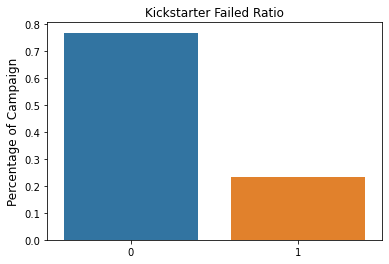

In [7]:
target = df.Failed.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Kickstarter Failed Ratio')
plt.ylabel('Percentage of Campaign', fontsize=12);

([<matplotlib.patches.Wedge at 0x7fcda5fc15e0>,
 [Text(-0.8218373647309076, 0.7311520675838626, ''),
  Text(0.8218373305032085, -0.7311521060568453, '')])

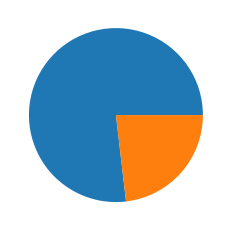

In [8]:
plt.pie(df.Failed.value_counts(normalize=True))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31953 entries, 0 to 31952
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         31953 non-null  int64  
 1   region                     31953 non-null  object 
 2   created_at                 31953 non-null  object 
 3   deadline                   31953 non-null  object 
 4   launched_at                31953 non-null  object 
 5   pledged_usd                31953 non-null  float64
 6   main_category              31953 non-null  object 
 7   sub_category               31953 non-null  object 
 8   goal_usd                   31953 non-null  float64
 9   campaign_duration          31953 non-null  int64  
 10  create_to_launch_duration  31953 non-null  int64  
 11  Failed                     31953 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 2.9+ MB


In [10]:
df.campaign_duration.mean()

31.892498356961788

In [12]:
df.create_to_launch_duration.mean()

59.865427346415046

# Subset1

In [6]:
subset1 = df.loc[:,['Failed', 'goal_usd', 'campaign_duration']]

In [7]:
subset1.head()

,Failed,goal_usd,campaign_duration
0,0,3410.199225,21
1,0,5000.000000,29
2,0,7700.000000,30
3,0,10000.000000,30
4,0,10000.000000,29


### Splitting data to train, val, test: 0.6, 0.2, 0.2 and scaling the features

In [8]:
X, y = subset1.drop(['Failed'], axis=1), subset1.Failed

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4,random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [9]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,random_state=42)

scaler = StandardScaler()
X_val_sc = scaler.fit_transform(X_val)

## Machine Learning Baseline

### Baseline Linear Regression

In [10]:
lr = LogisticRegression(C=1000) #no regularization
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)
lr_confusion = confusion_matrix(y_val, lr_pred)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

lr_y_score = lr.predict_proba(X_val_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4906
           1       0.52      0.38      0.44      1485

    accuracy                           0.77      6391
   macro avg       0.67      0.64      0.65      6391
weighted avg       0.75      0.77      0.76      6391



In [11]:
print(lr_confusion)

[[4389  517]
 [ 927  558]]


In [12]:
print(lr_ac)

0.7740572680331717


<AxesSubplot:>

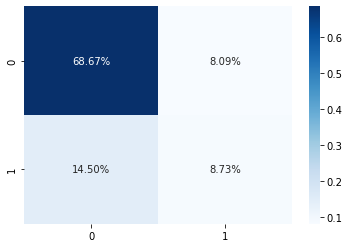

In [13]:
sns.heatmap(lr_confusion/np.sum(lr_confusion), annot = True, fmt='.2%', cmap='Blues')

<AxesSubplot:>

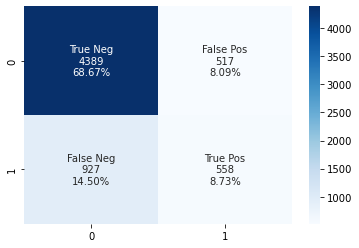

In [14]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_confusion.flatten()/np.sum(lr_confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_confusion, annot=labels, fmt="", cmap='Blues')

### Baseline KNN model

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_val_sc)

print(metrics.accuracy_score(y_val, y_pred))

0.7748396182131122


# Subset 2

In [16]:
subset2 = df.loc[:,['Failed', 'goal_usd', 'campaign_duration', 'create_to_launch_duration']]

In [17]:
X, y = subset2.drop(['Failed'], axis=1), subset2.Failed

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4,random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [18]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,random_state=42)

scaler = StandardScaler()
X_val_sc = scaler.fit_transform(X_val)

In [19]:
lr = LogisticRegression(C=1000) #no regularization
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)
lr_confusion = confusion_matrix(y_val, lr_pred)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

lr_y_score = lr.predict_proba(X_val_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4906
           1       0.52      0.38      0.44      1485

    accuracy                           0.77      6391
   macro avg       0.67      0.64      0.65      6391
weighted avg       0.76      0.77      0.76      6391



In [20]:
print(lr_confusion)

[[4392  514]
 [ 924  561]]


In [21]:
print(lr_ac)

0.7749960882491003


<AxesSubplot:>

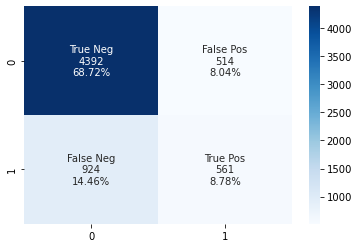

In [22]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_confusion.flatten()/np.sum(lr_confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_confusion, annot=labels, fmt="", cmap='Blues')

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_val_sc)

print(metrics.accuracy_score(y_val, y_pred))

0.7859489907682679


# More Feature Engineering

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31953 entries, 0 to 31952
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         31953 non-null  int64  
 1   region                     31953 non-null  object 
 2   created_at                 31953 non-null  object 
 3   deadline                   31953 non-null  object 
 4   launched_at                31953 non-null  object 
 5   pledged_usd                31953 non-null  float64
 6   main_category              31953 non-null  object 
 7   sub_category               31953 non-null  object 
 8   goal_usd                   31953 non-null  float64
 9   campaign_duration          31953 non-null  int64  
 10  create_to_launch_duration  31953 non-null  int64  
 11  Failed                     31953 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 2.9+ MB


In [25]:
df.head()

,id,region,created_at,deadline,launched_at,pledged_usd,main_category,sub_category,goal_usd,campaign_duration,create_to_launch_duration,Failed
0,1846656783,EU,2020-04-16 05:18:45,2020-05-15 01:58:55,2020-04-24 01:58:55,6172.413435,Publishing,Children's Books,3410.199225,21,7,0
1,1091394927,US,2020-05-27 06:47:29,2020-07-09 09:00:00,2020-06-09 09:14:06,5643.000000,Design,Product Design,5000.000000,29,13,0
2,1892452780,US,2020-04-15 07:11:52,2020-07-13 05:22:08,2020-06-13 05:22:08,9857.440000,Design,Product Design,7700.000000,30,58,0
3,591954572,US,2016-12-27 13:19:41,2020-04-23 19:33:00,2020-03-24 10:02:22,116629.000000,Design,Product Design,10000.000000,30,1182,0
4,1488247508,US,2020-07-17 19:34:35,2020-08-26 23:59:00,2020-07-28 08:05:39,11880.000000,Design,Product Design,10000.000000,29,10,0


In [26]:
df.drop('pledged_usd', axis = 1, inplace = True)

In [27]:
df = pd.get_dummies(df, columns = ['region'])

In [28]:
df = pd.get_dummies(df, columns = ['main_category'])

In [29]:
df.head()

,id,created_at,deadline,launched_at,sub_category,goal_usd,campaign_duration,create_to_launch_duration,Failed,region_AM_non_US,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,1846656783,2020-04-16 05:18:45,2020-05-15 01:58:55,2020-04-24 01:58:55,Children's Books,3410.199225,21,7,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1091394927,2020-05-27 06:47:29,2020-07-09 09:00:00,2020-06-09 09:14:06,Product Design,5000.000000,29,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1892452780,2020-04-15 07:11:52,2020-07-13 05:22:08,2020-06-13 05:22:08,Product Design,7700.000000,30,58,0,0,...,0,0,0,0,0,0,0,0,0,0
3,591954572,2016-12-27 13:19:41,2020-04-23 19:33:00,2020-03-24 10:02:22,Product Design,10000.000000,30,1182,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1488247508,2020-07-17 19:34:35,2020-08-26 23:59:00,2020-07-28 08:05:39,Product Design,10000.000000,29,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31953 entries, 0 to 31952
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          31953 non-null  int64  
 1   created_at                  31953 non-null  object 
 2   deadline                    31953 non-null  object 
 3   launched_at                 31953 non-null  object 
 4   sub_category                31953 non-null  object 
 5   goal_usd                    31953 non-null  float64
 6   campaign_duration           31953 non-null  int64  
 7   create_to_launch_duration   31953 non-null  int64  
 8   Failed                      31953 non-null  int64  
 9   region_AM_non_US            31953 non-null  uint8  
 10  region_AP                   31953 non-null  uint8  
 11  region_EU                   31953 non-null  uint8  
 12  region_US                   31953 non-null  uint8  
 13  main_category_Art           319

In [31]:
df.to_csv('modeling_data.csv', index = False)

# Subset 3

In [32]:
subset3 = df.drop(['id', 'created_at', 'deadline', 'launched_at', 'sub_category'], axis=1)

In [33]:
X, y = subset3.drop(['Failed'], axis=1), subset3.Failed

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4,random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [34]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,random_state=42)

scaler = StandardScaler()
X_val_sc = scaler.fit_transform(X_val)

In [35]:
lr = LogisticRegression(C=1000) #no regularization
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)
lr_confusion = confusion_matrix(y_val, lr_pred)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

lr_y_score = lr.predict_proba(X_val_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4906
           1       0.57      0.40      0.47      1485

    accuracy                           0.79      6391
   macro avg       0.70      0.65      0.67      6391
weighted avg       0.77      0.79      0.78      6391



In [36]:
print(lr_confusion)

[[4469  437]
 [ 894  591]]


In [37]:
print(lr_ac)

0.7917383820998278


<AxesSubplot:>

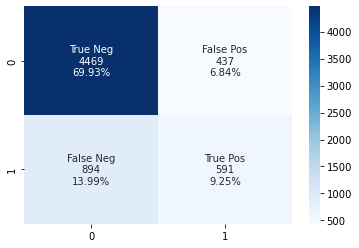

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_confusion.flatten()/np.sum(lr_confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_confusion, annot=labels, fmt="", cmap='Blues')

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_val_sc)

print(metrics.accuracy_score(y_val, y_pred))

0.8177124080738538


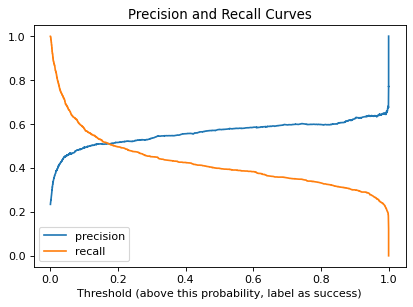

In [40]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lr.predict_proba(X_val_sc)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as success)');
plt.title('Precision and Recall Curves');

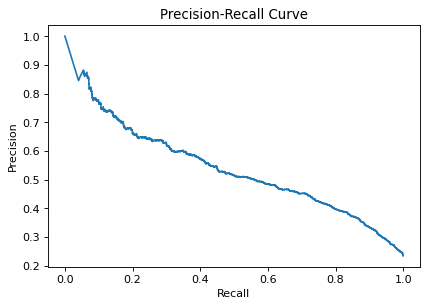

In [41]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val_sc)[:,1])

ROC AUC score =  0.7886099066490423


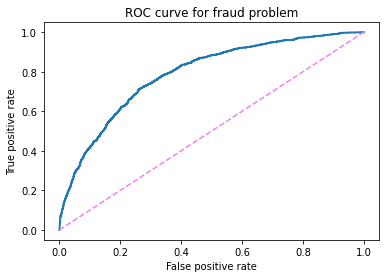

In [43]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_val, lr.predict_proba(X_val_sc)[:,1]))

In [44]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_val, lr.predict_proba(X_val_sc))))

Log-loss on logit: 0.9253


In [45]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_val, dc.predict_proba(X_val_sc))))

Log-loss on dummy classifier: 0.5421


In [46]:
print("Logistic accuracy: {:6.4f}".format(lr.score(X_val_sc, y_val)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_val_sc, y_val)))

Logistic accuracy: 0.7917
Dummy accuracy: 0.7676


# Test scores on last subset, logistic regression

In [47]:
scaler = StandardScaler()
X_test_sc = scaler.fit_transform(X_test)

In [48]:
lr = LogisticRegression(C=1000) #no regularization
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)
lr_confusion = confusion_matrix(y_test, lr_pred)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4901
           1       0.75      0.37      0.49      1490

    accuracy                           0.82      6391
   macro avg       0.79      0.67      0.69      6391
weighted avg       0.81      0.82      0.80      6391



In [49]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.8237 
 Precision: 0.7476 
 Recall: 0.3678 
 F1: 0.4930


# Validation scores on last subset, logistic regression

In [50]:
lr = LogisticRegression(C=1000) #no regularization
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)
lr_confusion = confusion_matrix(y_val, lr_pred)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

lr_y_score = lr.predict_proba(X_val_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4906
           1       0.57      0.40      0.47      1485

    accuracy                           0.79      6391
   macro avg       0.70      0.65      0.67      6391
weighted avg       0.77      0.79      0.78      6391



In [51]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.7917 
 Precision: 0.5749 
 Recall: 0.3980 
 F1: 0.4704


# Train scores on last subset, logistic regression

In [52]:
lr = LogisticRegression(C=1000) #no regularization
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_train_sc)
lr_confusion = confusion_matrix(y_train, lr_pred)

lr_ac = lr.score(X_train_sc, y_train)
lr_precision = precision_score(y_train, lr_pred)
lr_recall = recall_score(y_train, lr_pred)
lr_f1 = f1_score(y_train, lr_pred)

lr_y_score = lr.predict_proba(X_train_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_train, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     14751
           1       0.69      0.42      0.52      4420

    accuracy                           0.82     19171
   macro avg       0.77      0.68      0.71     19171
weighted avg       0.81      0.82      0.81     19171



In [53]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.8233 
 Precision: 0.6915 
 Recall: 0.4215 
 F1: 0.5238
